In [1]:
import numpy as np

from IPython.display import display
from PIL import Image
from peewee import IntegerField, Model, CharField, SqliteDatabase, AutoField
import matplotlib.pyplot as plt

db = SqliteDatabase('events-testing-after-fix.db')


class Events(Model):
    id = AutoField()
    time = IntegerField()
    agent = CharField()
    event = CharField()
    participant_id = IntegerField()
    old_value = CharField(null=True)
    new_value = CharField(null=True)
    screenshot_file = CharField(null=True)

    class Meta:
        database = db

def show_screenshot_for_record(_id):
    events = Events.select().where(Events.id == _id).order_by(Events.time.asc()).limit(1)
    if len(events) == 0:
        print("No events found for id: ", _id)
        return
    event = events[0]
    image_path = event.screenshot_file
    print(_id)
    display(Image.open(image_path))


/Users/shady/Git/school/flow/apps/backend/velocityThreshold.py:62: RuntimeWarning: invalid value encountered in scalar divide
  rho = cov[0,1] / (sx*sy)


A
                x            y        ts
1257   972.442703  1487.003117  0.329598
1258   972.442703  1487.003117  0.329836
1259   972.442703  1487.003117  0.330075
1420   650.502243  1564.063454  0.371811
1421   650.502243  1564.063454  0.372050
1422   650.502243  1564.063454  0.372288
3401  1530.325928  1697.062054  0.846411
3402  1494.743805  1716.329498  0.846649
3403  1494.743805  1716.329498  0.846888
3404  1462.471466  1576.365051  0.847126
----
           ts       len       i  n            x            y   sx   sy  rho
43   0.329598  0.000477  1257.0  3   972.442703  1487.003117  0.0  0.0  NaN
54   0.371811  0.000477  1420.0  3   650.502243  1564.063454  0.0  0.0  NaN
123  0.846649  0.000238  3402.0  2  1494.743805  1716.329498  0.0  0.0  NaN


/Users/shady/Git/school/flow/apps/backend/velocityThreshold.py:62: RuntimeWarning: invalid value encountered in scalar divide
  rho = cov[0,1] / (sx*sy)


A
                x            y        ts
4515  1133.359909  2177.676144  0.808434
4516  1133.359909  2177.676144  0.808613
4517  1133.359909  2177.676144  0.808792
4529  1314.555359  1683.228378  0.813617
4530  1314.555359  1683.228378  0.813795
4531  1314.555359  1683.228378  0.813974
4532  1465.439453  1486.122837  0.814153
4534  1496.133423  1441.678677  0.814510
5517  1625.755310  1479.187374  0.990172
5518  1849.315948  2204.481583  0.992673
5519  1844.547272  2196.951485  0.992852
5520  1844.547272  2196.951485  0.993031
5521  1839.206085  2188.517418  0.993209
5522  1775.979767  1517.193203  0.993388
5523  1664.906464  1508.959980  0.993567
5524  1657.207794  1489.386978  0.993746
5525  1608.435822  1451.734772  0.993924
5526  1660.795288  1441.122665  0.994103
----
           ts       len       i  n            x            y            sx  \
121  0.808434  0.000357  4515.0  3  1133.359909  2177.676144  4.351168e-15   
123  0.813617  0.000357  4529.0  3  1314.555359  1683.2283

/Users/shady/Git/school/flow/apps/backend/velocityThreshold.py:62: RuntimeWarning: invalid value encountered in scalar divide
  rho = cov[0,1] / (sx*sy)


A
                x            y        ts
0     1811.256866  1520.936794  0.000000
1     1811.256866  1520.936794  0.000223
3581  1639.526978  1872.099838  0.859519
3582  1639.526978  1872.099838  0.859743
3583  1639.526978  1872.099838  0.859966
3961  1599.190063  1636.222515  0.946845
3962  1599.190063  1636.222515  0.947069
----
           ts       len       i  n            x            y   sx   sy  rho
0    0.000000  0.000223     0.0  2  1811.256866  1520.936794  0.0  0.0  NaN
151  0.859519  0.000447  3581.0  3  1639.526978  1872.099838  0.0  0.0  NaN
162  0.946845  0.000223  3961.0  2  1599.190063  1636.222515  0.0  0.0  NaN


/Users/shady/Git/school/flow/apps/backend/velocityThreshold.py:62: RuntimeWarning: invalid value encountered in scalar divide
  rho = cov[0,1] / (sx*sy)
/Users/shady/Git/school/flow/apps/backend/velocityThreshold.py:62: RuntimeWarning: invalid value encountered in scalar divide
  rho = cov[0,1] / (sx*sy)


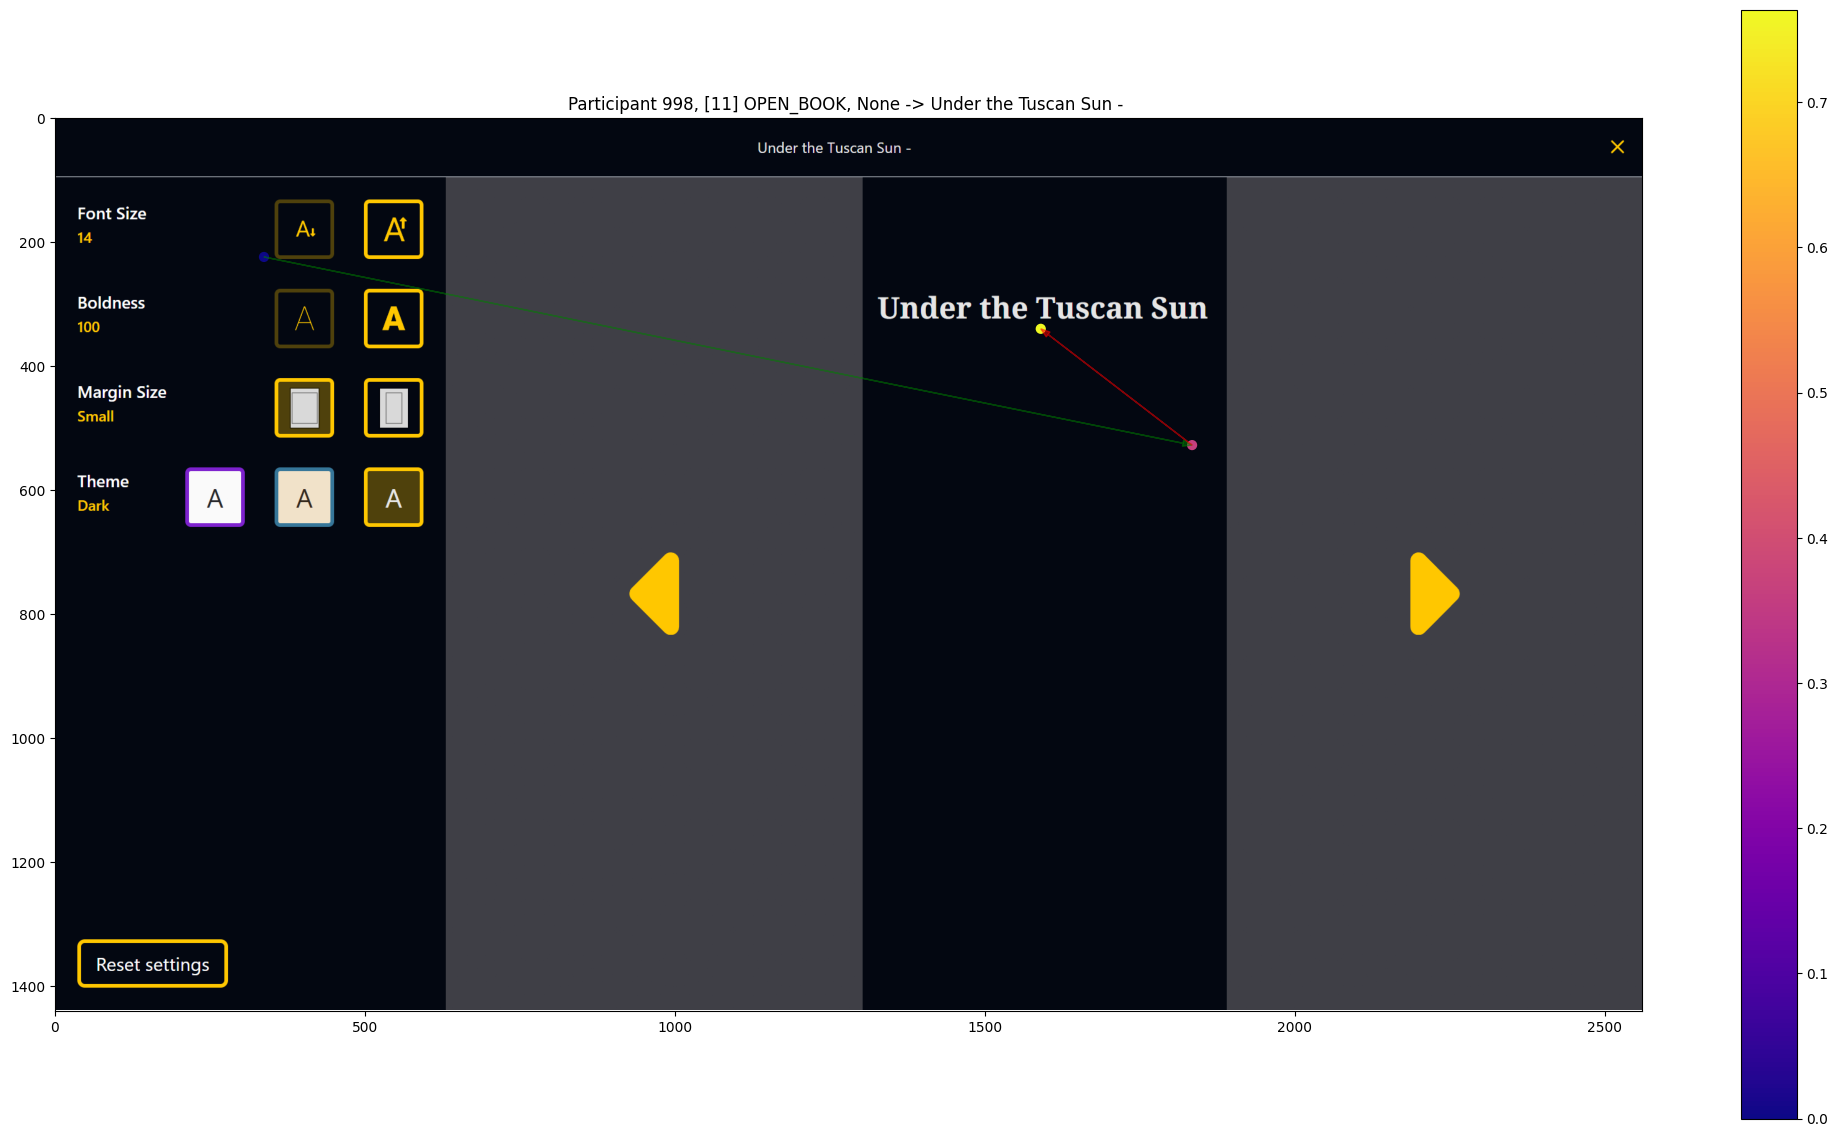

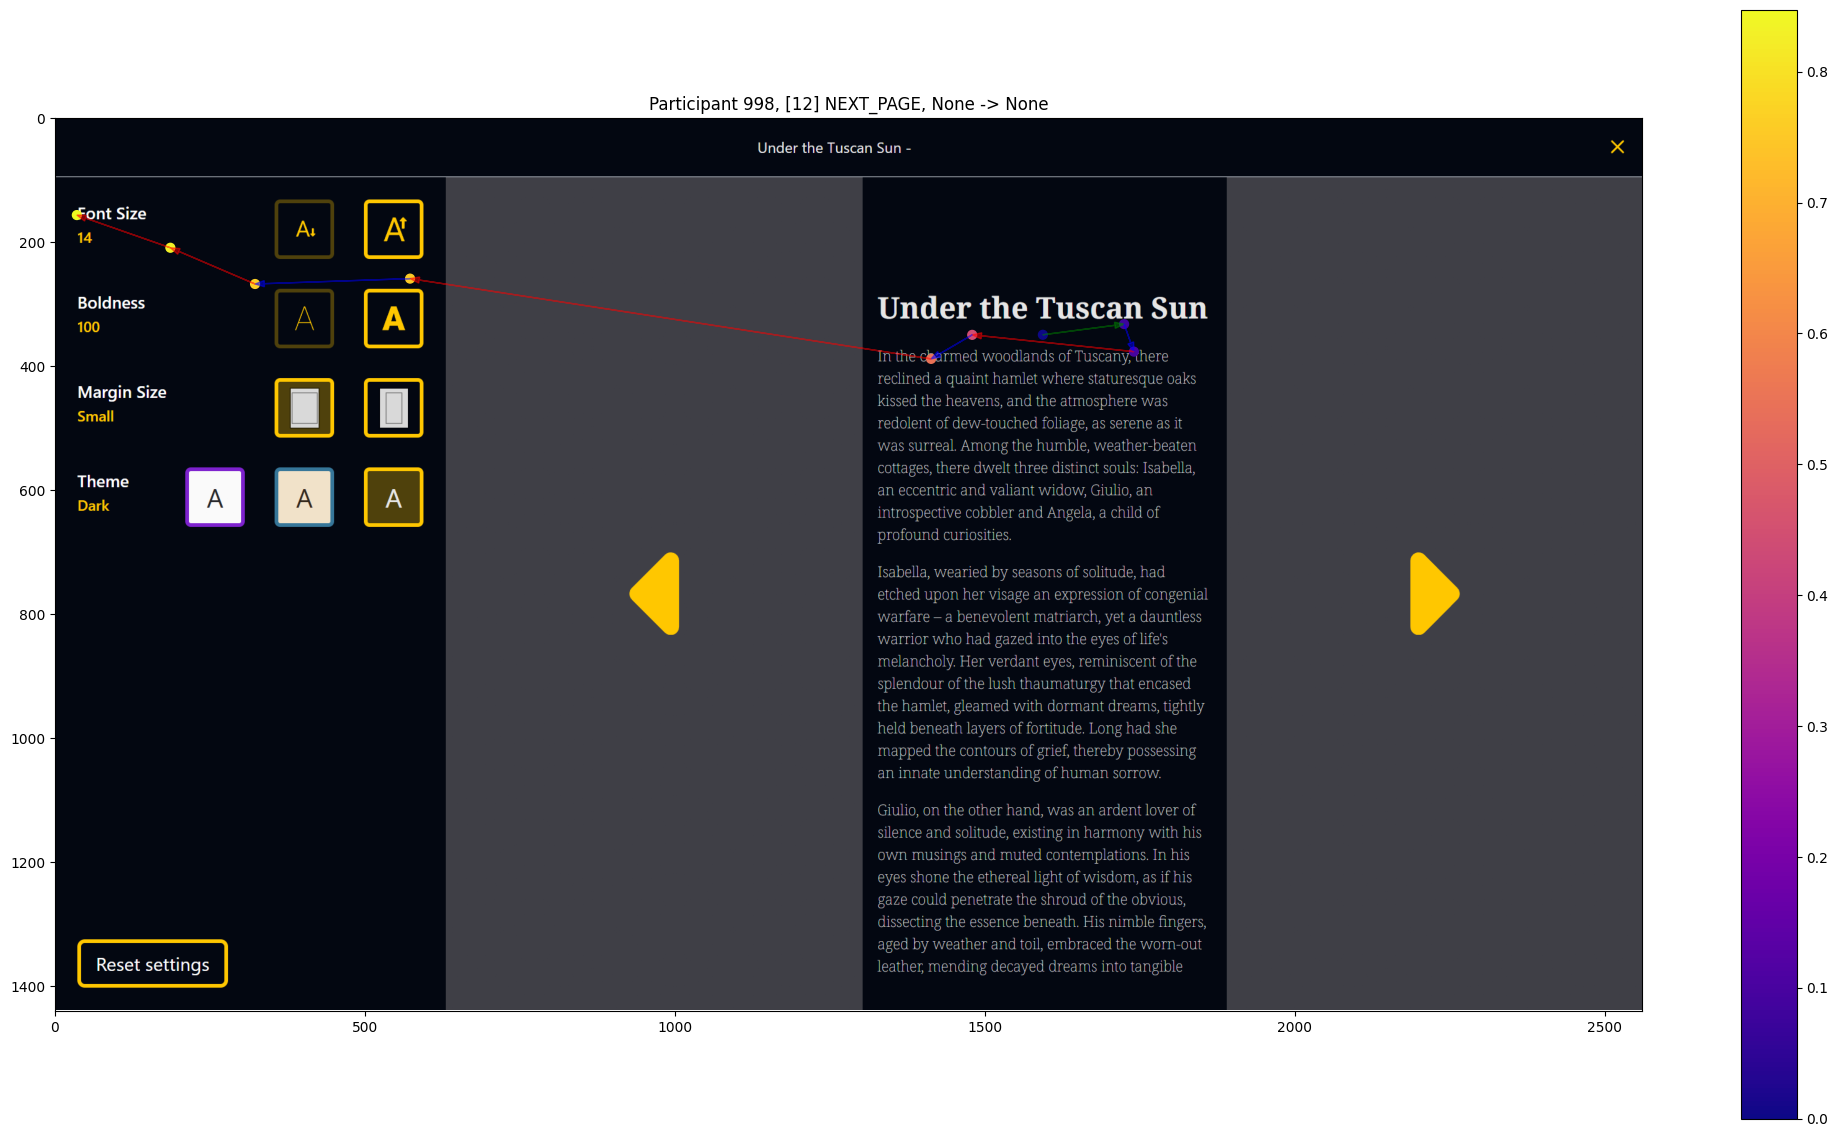

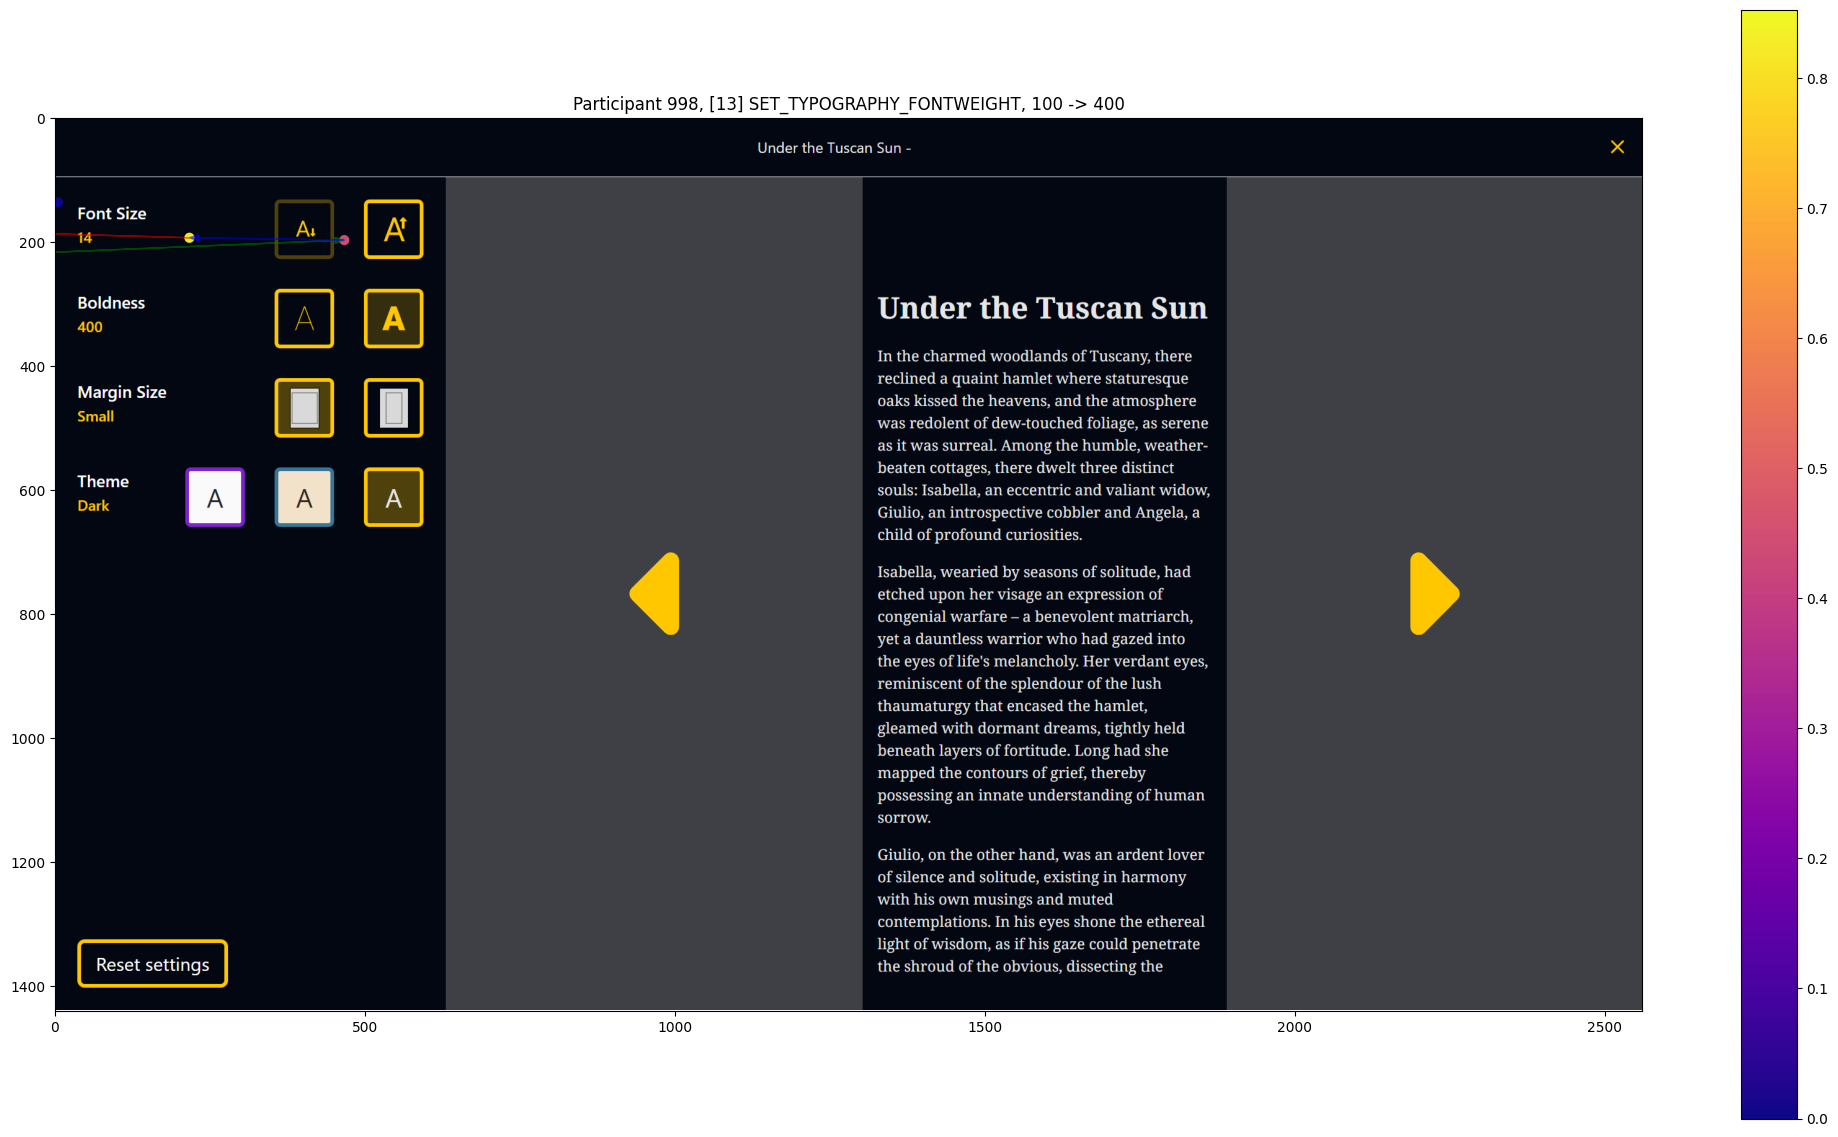

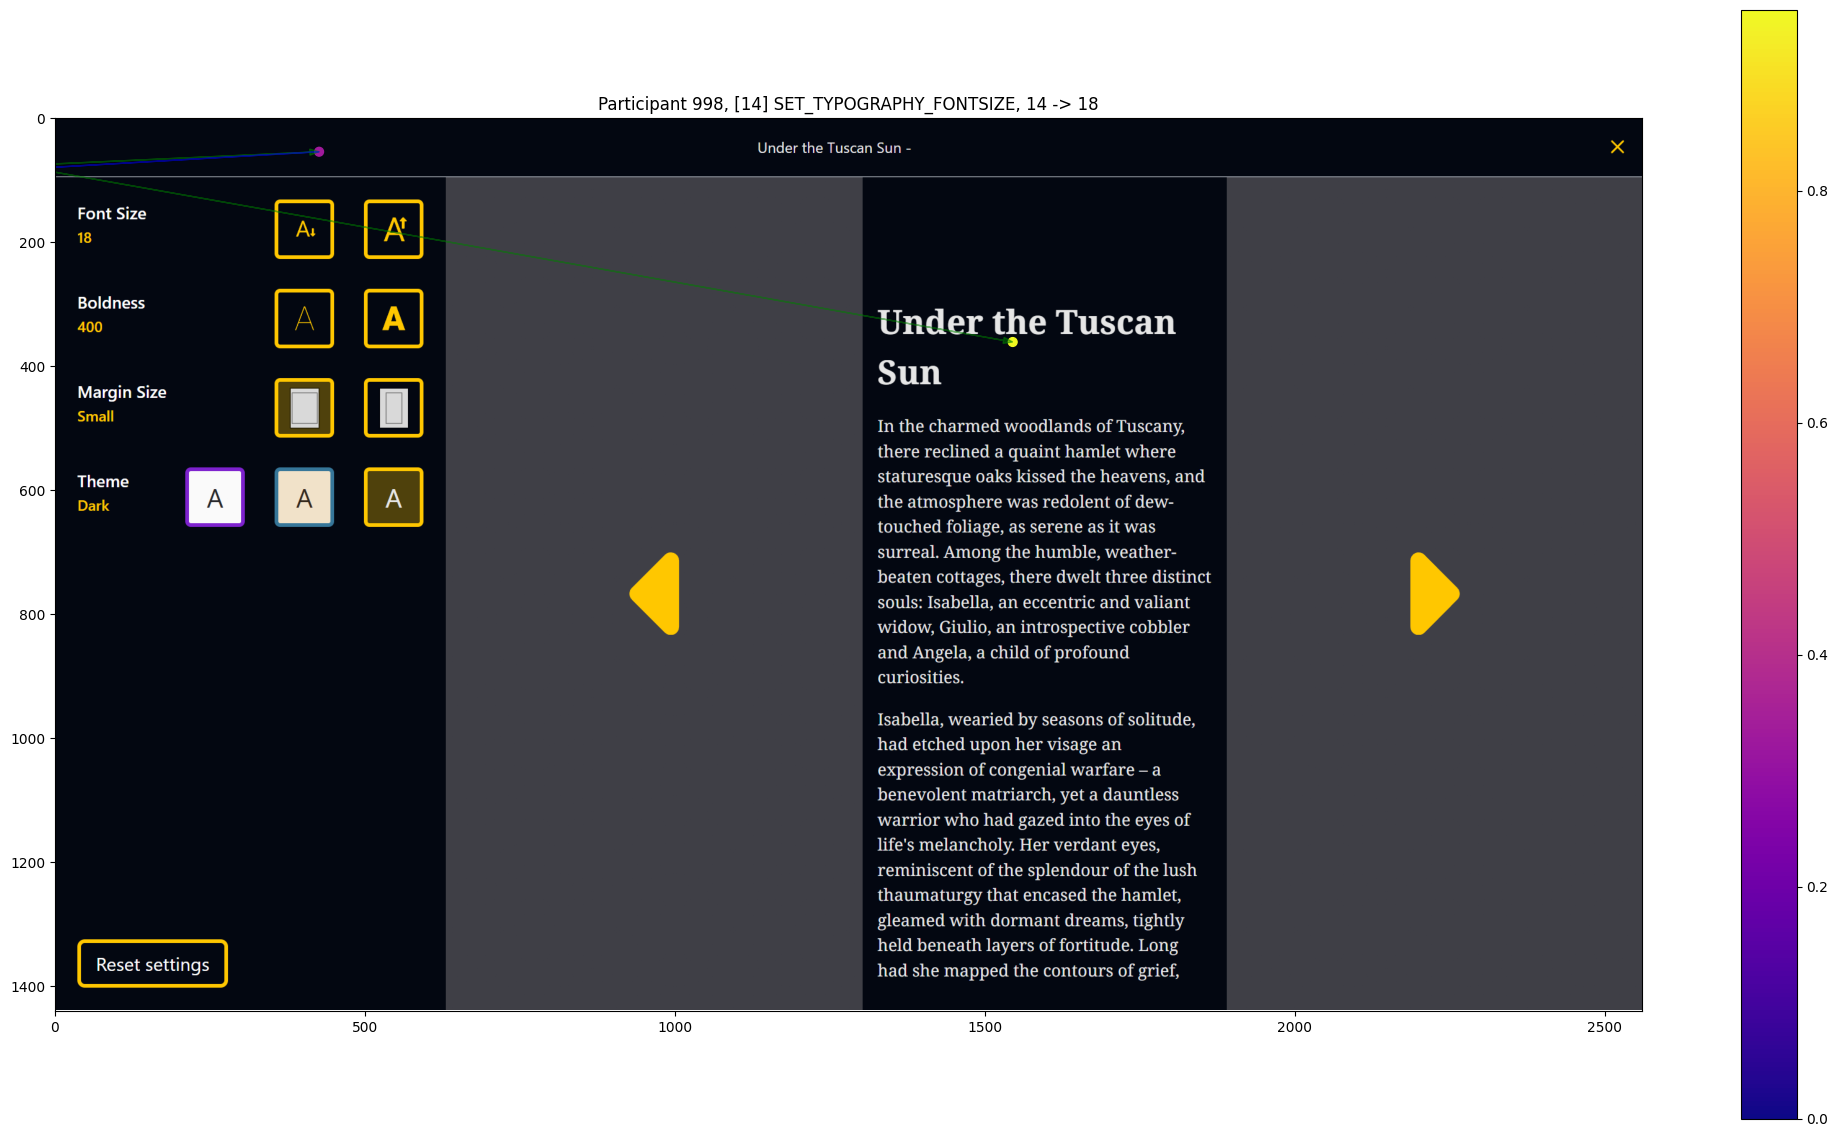

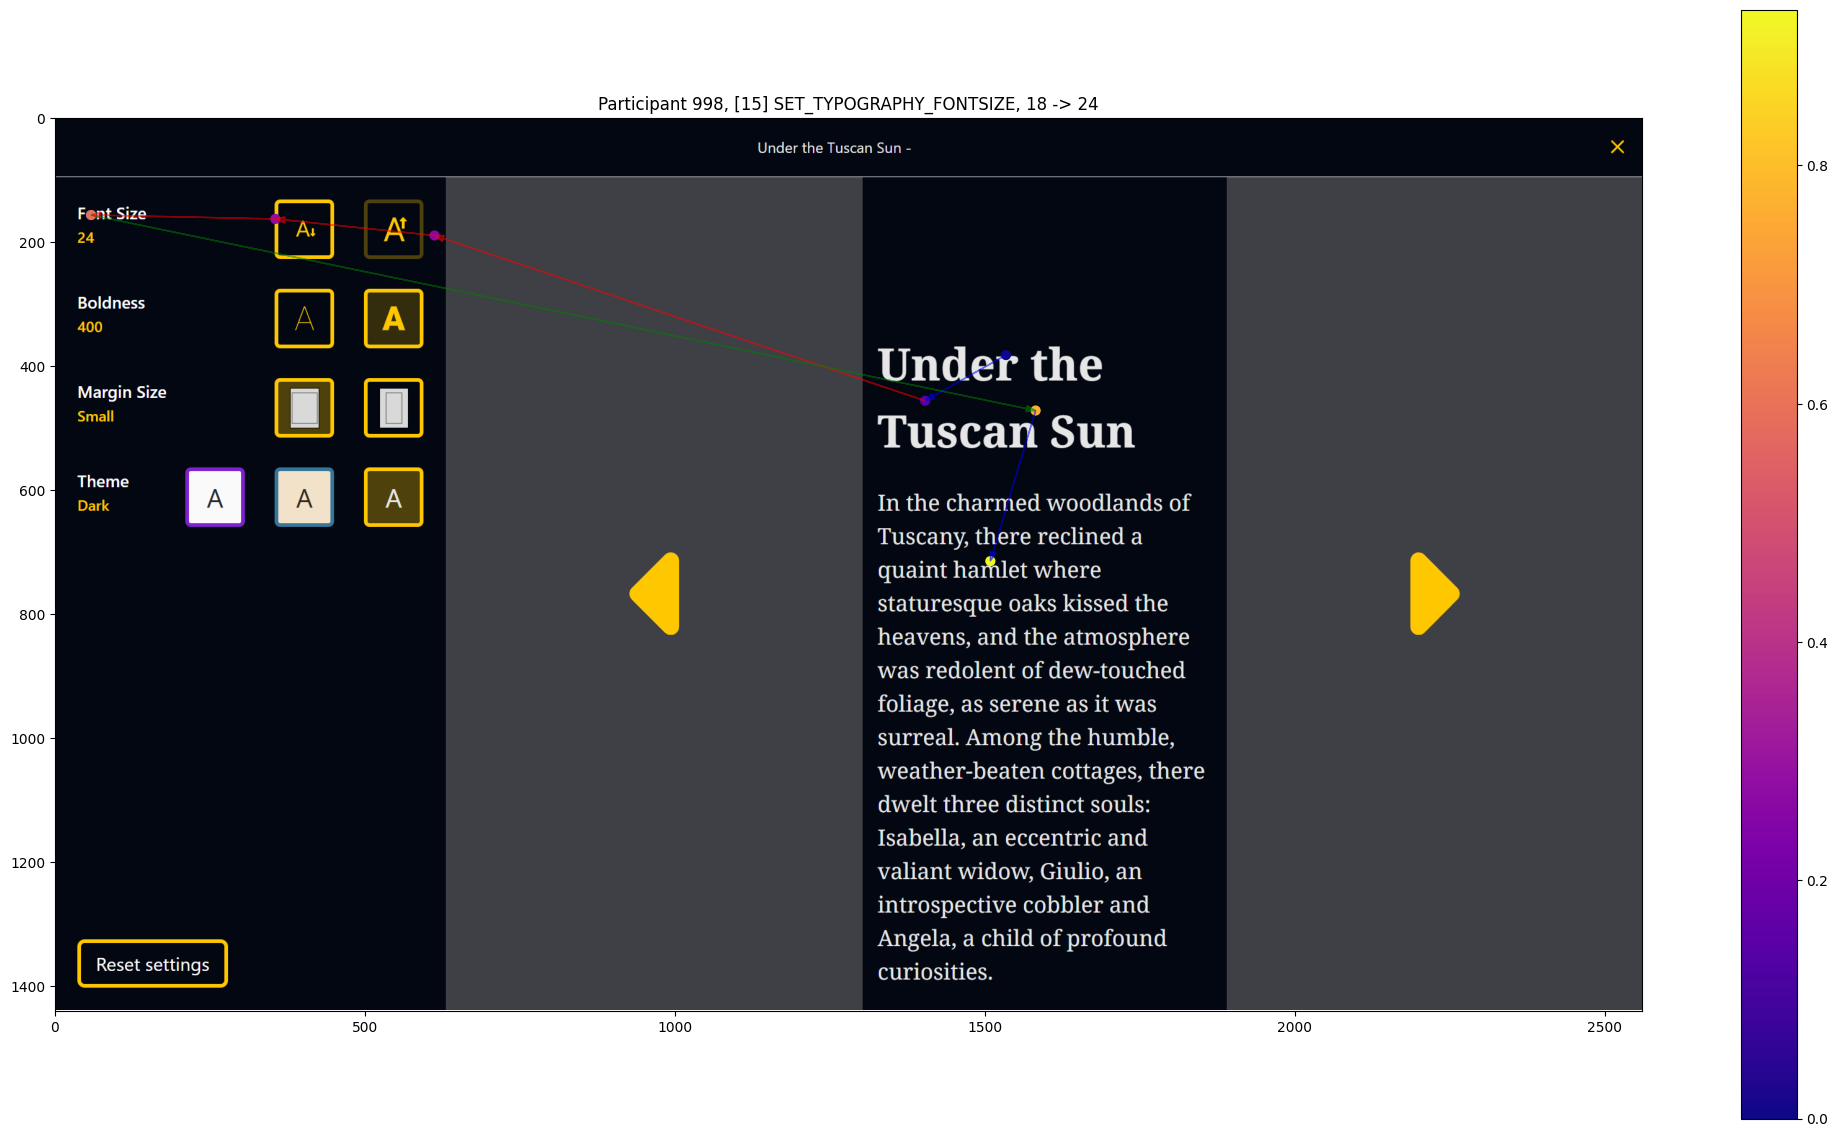

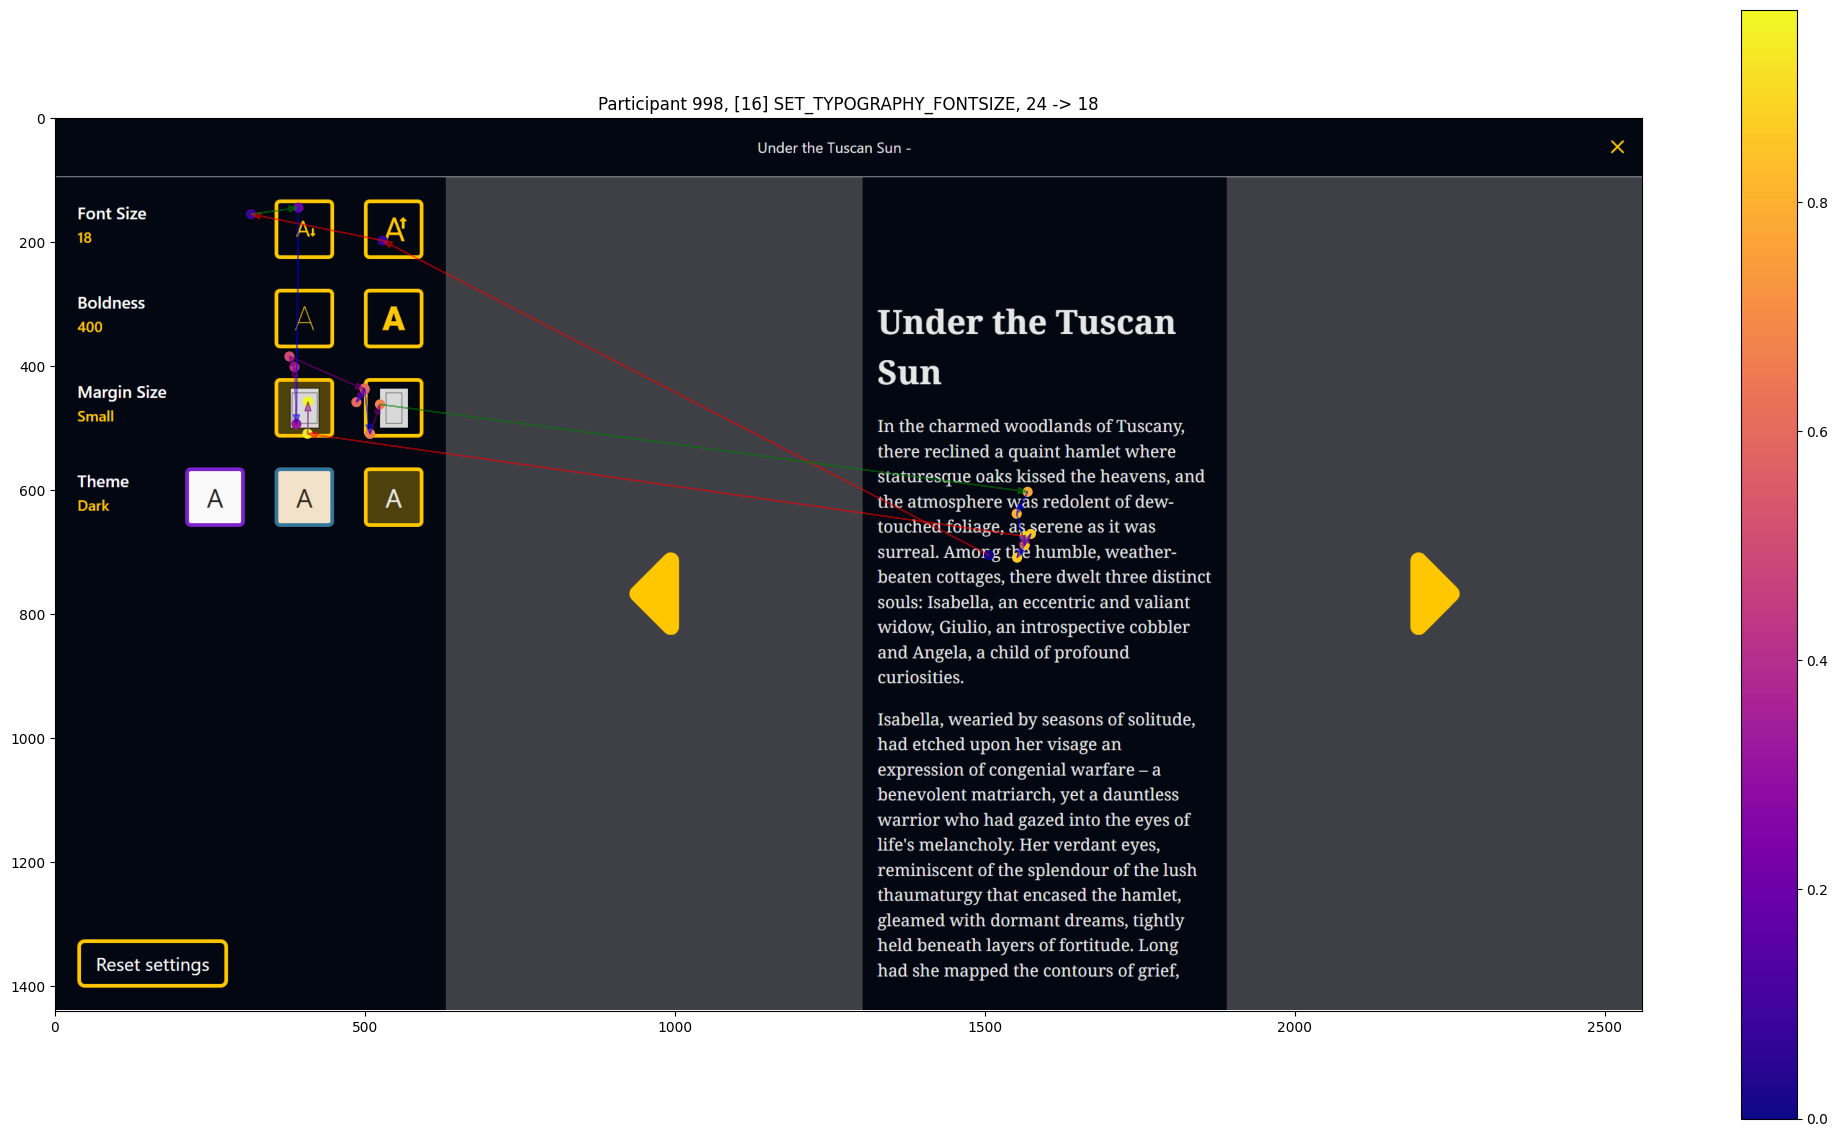

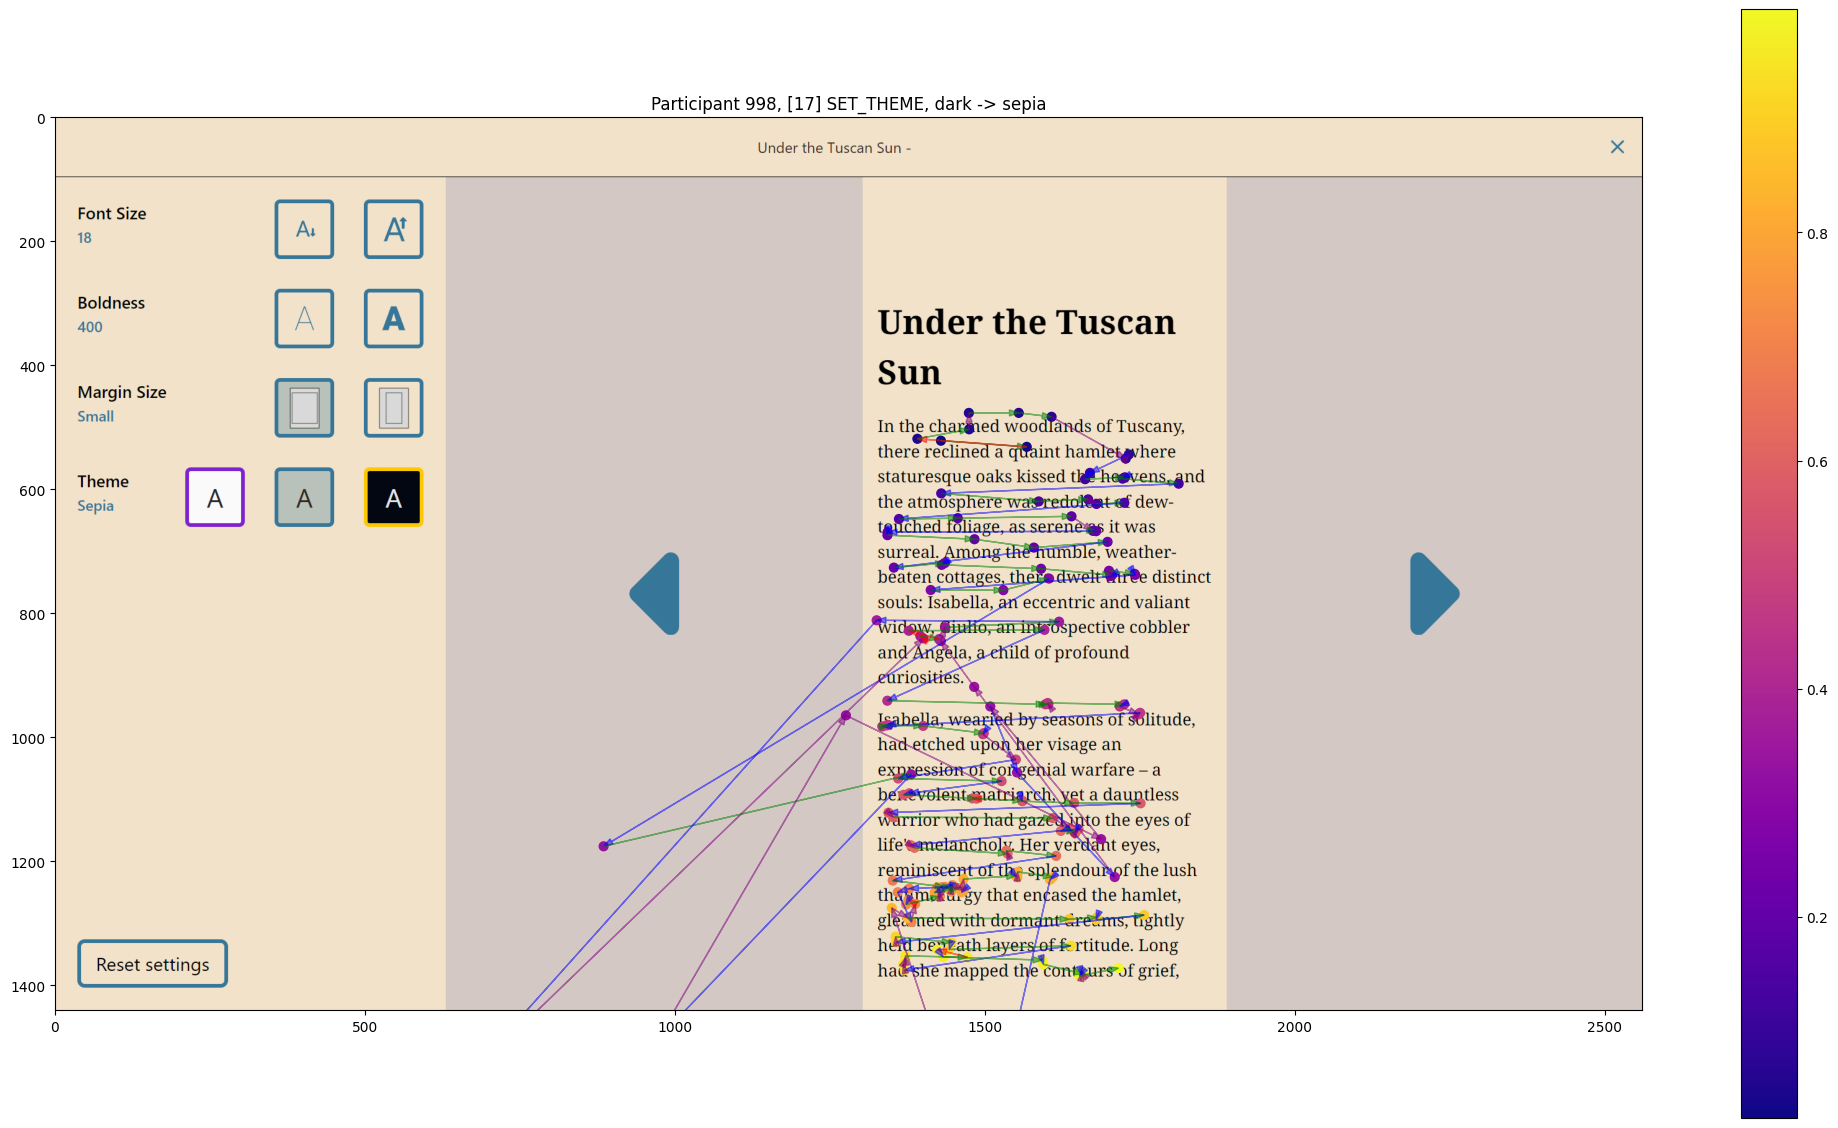

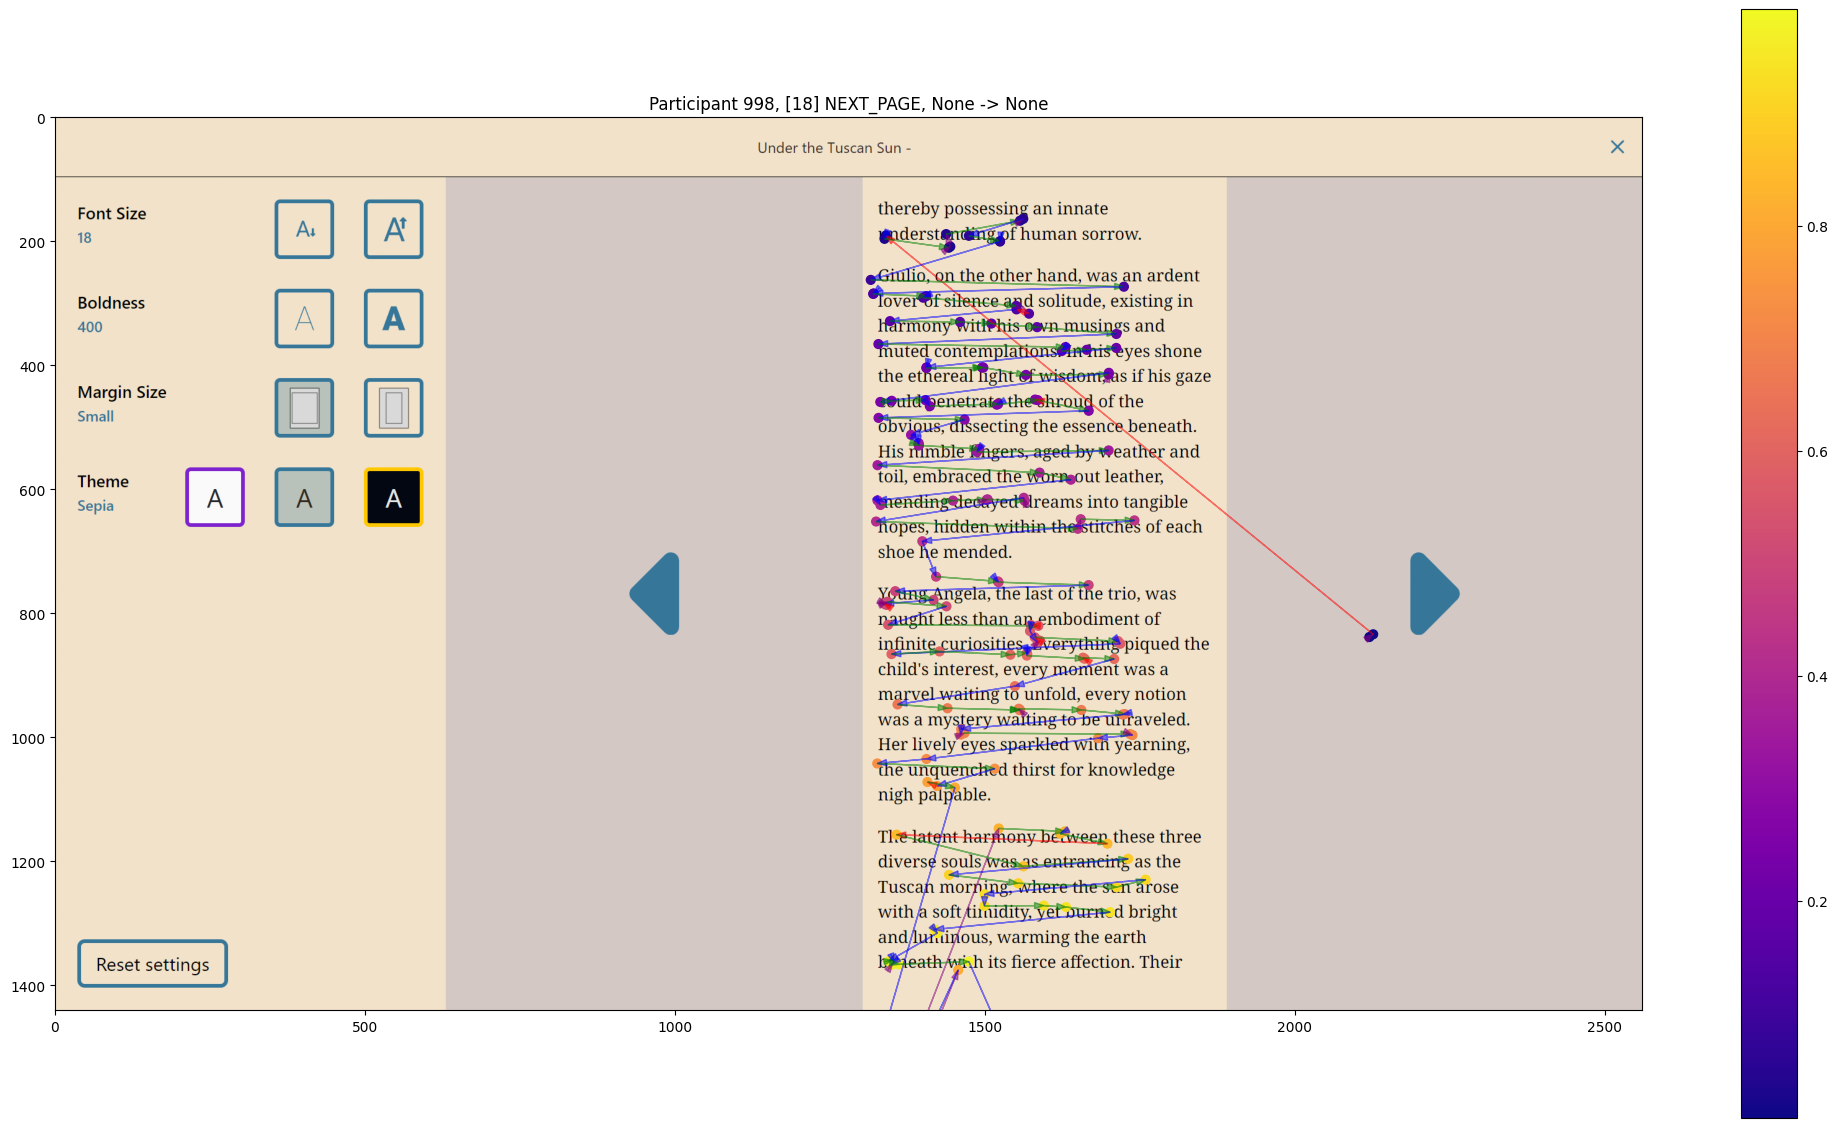

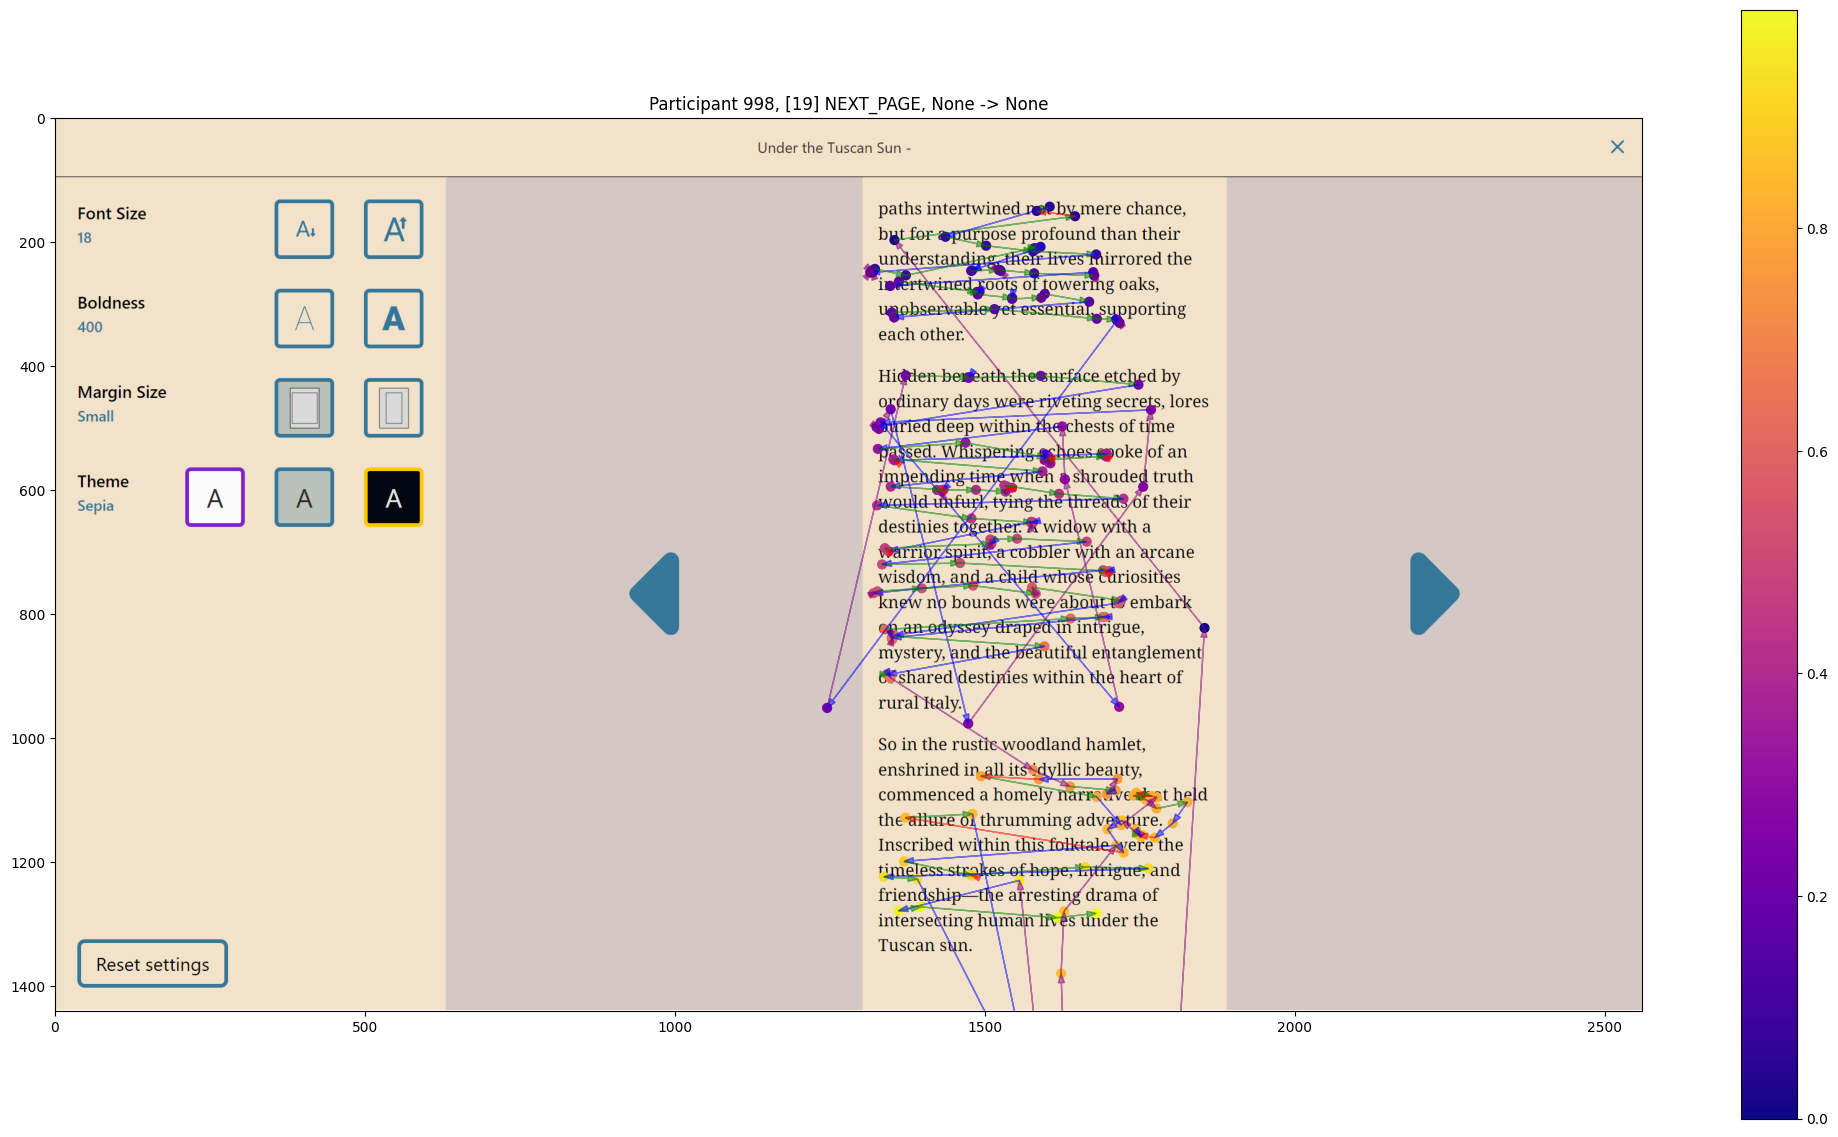

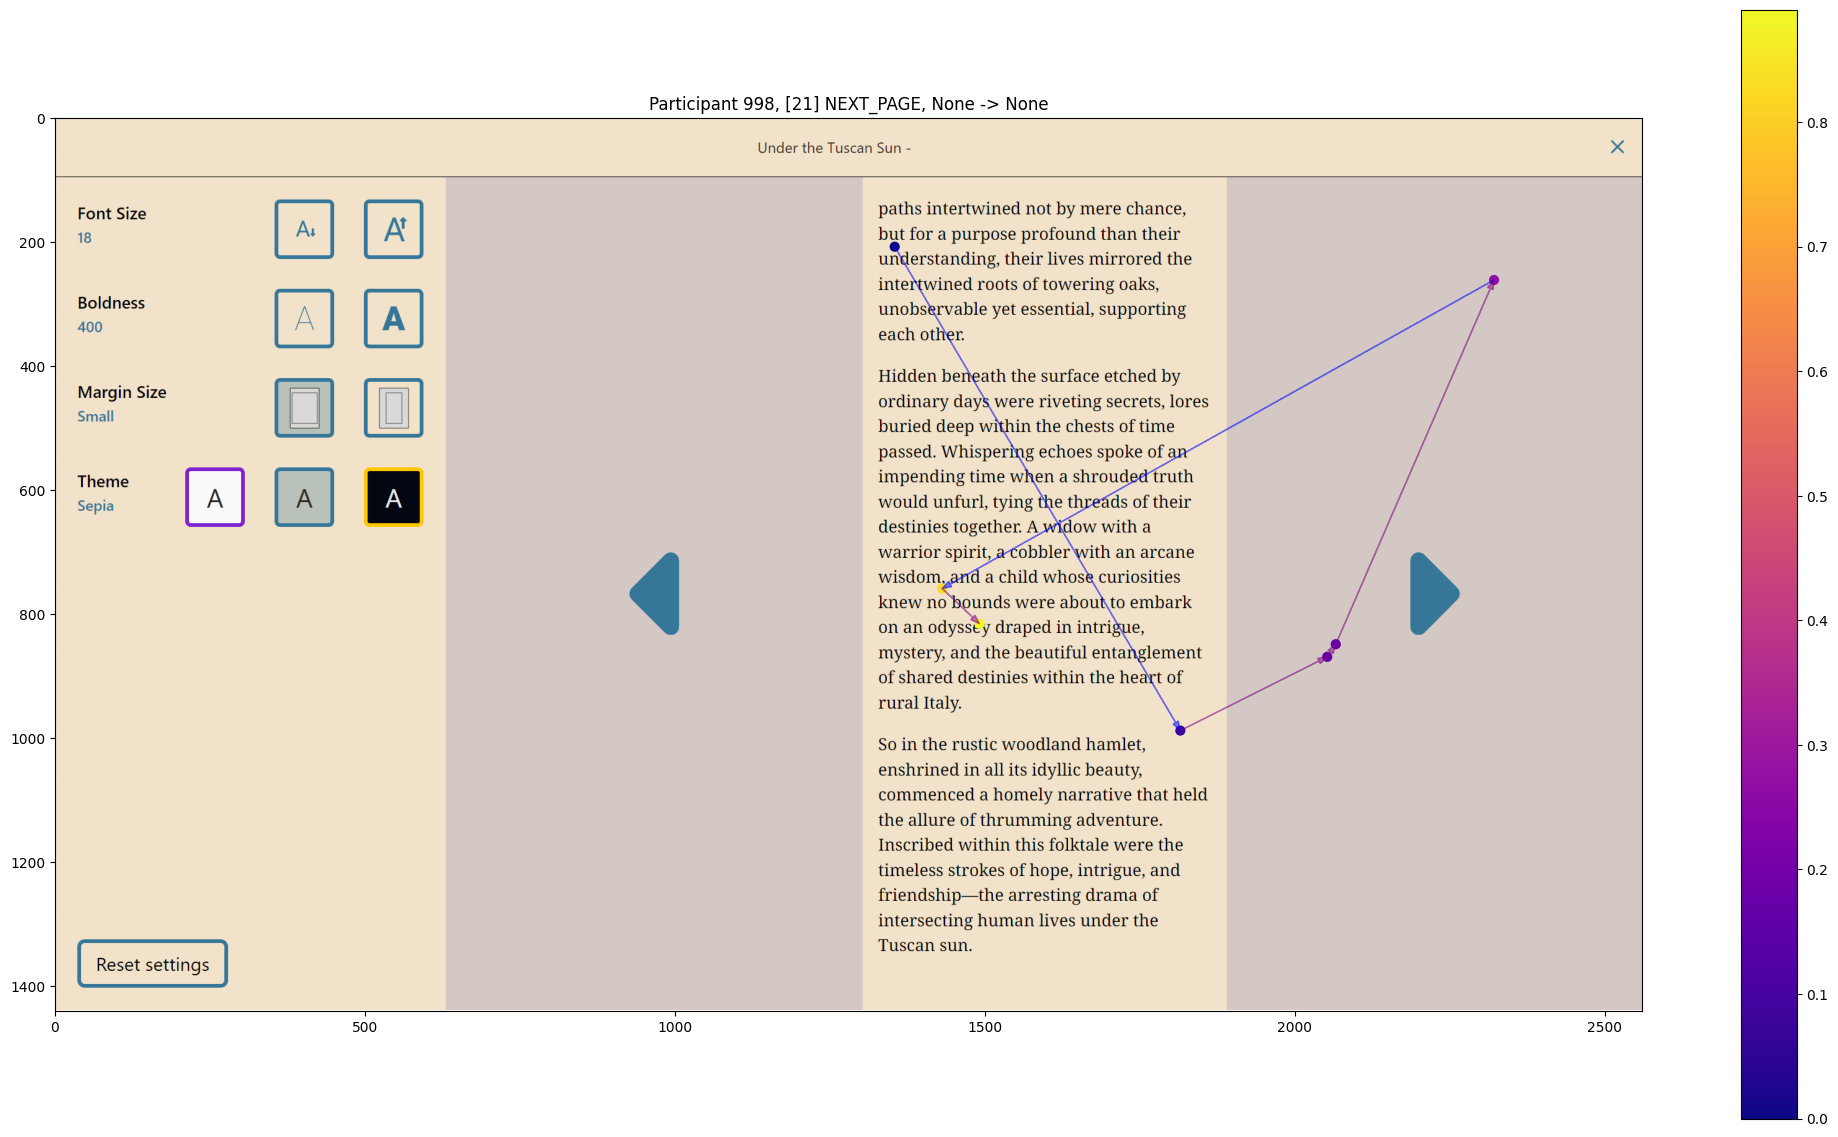

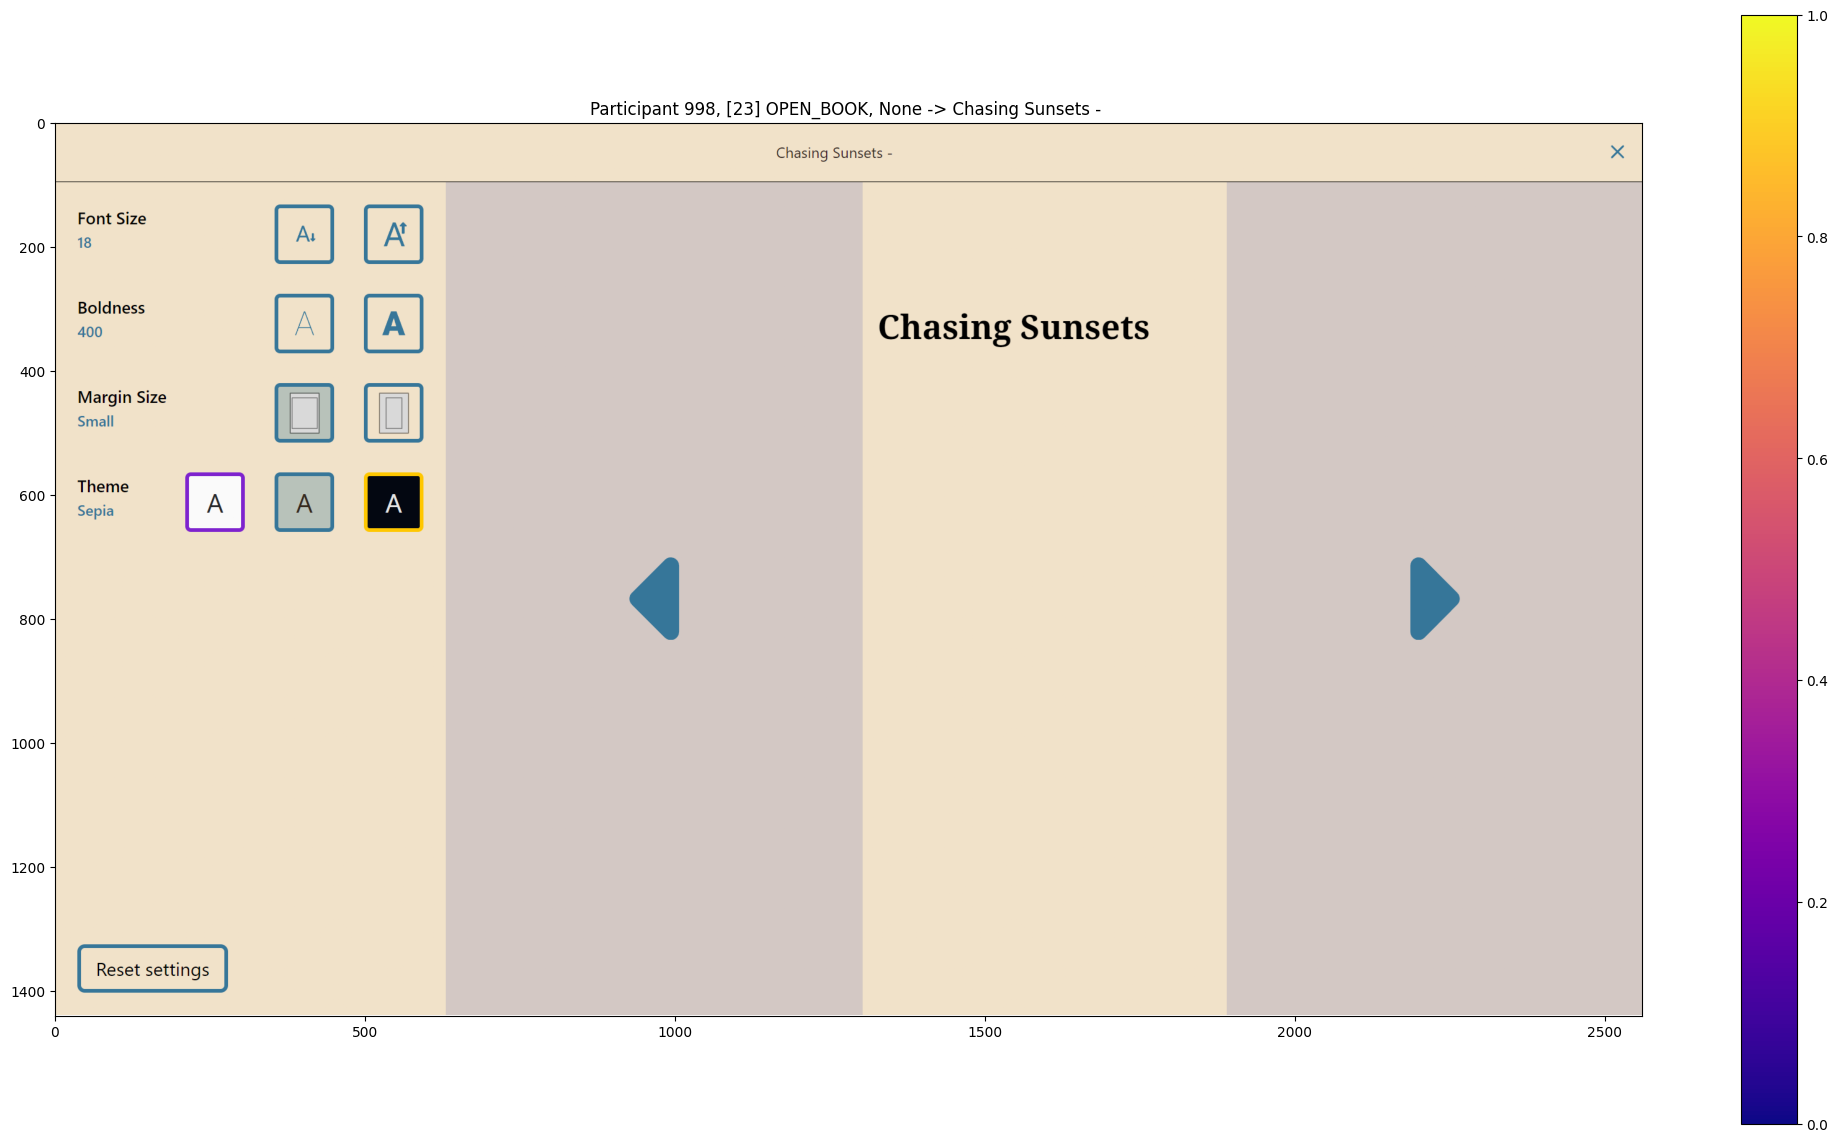

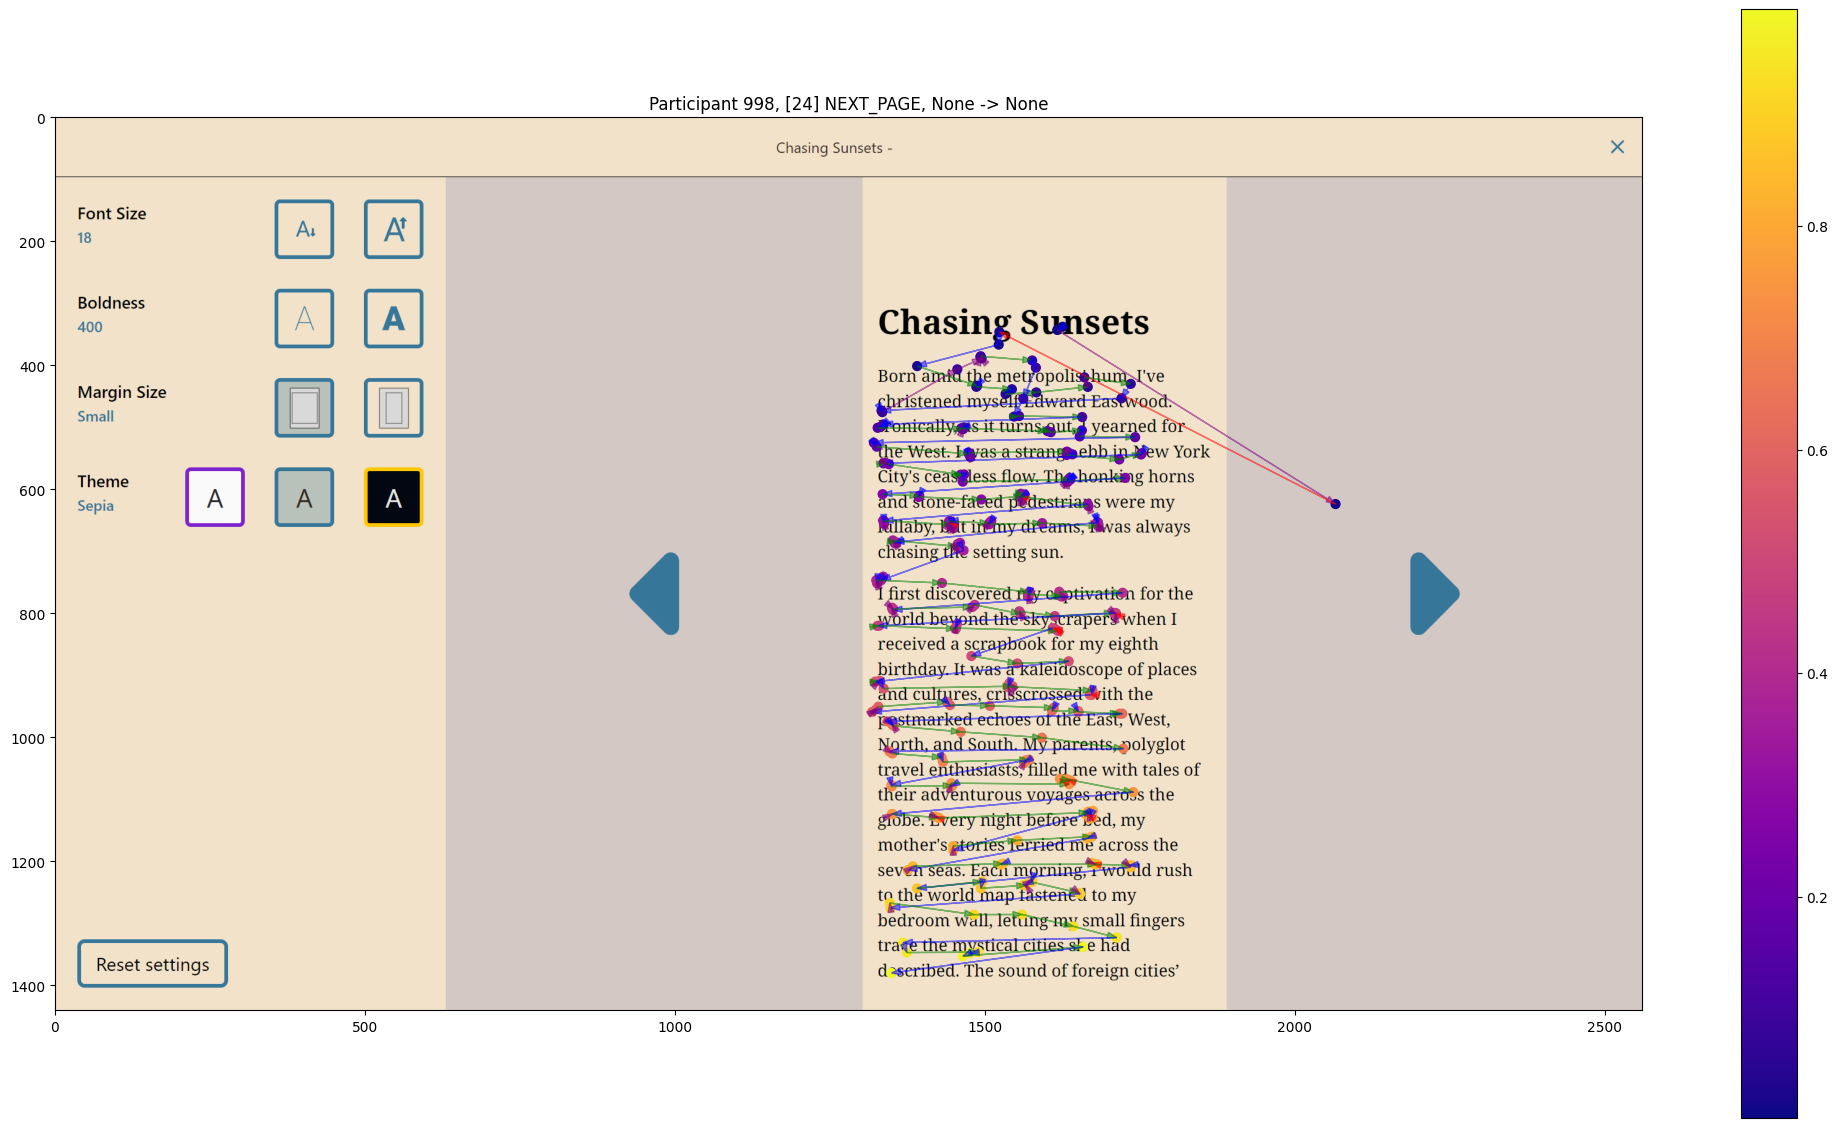

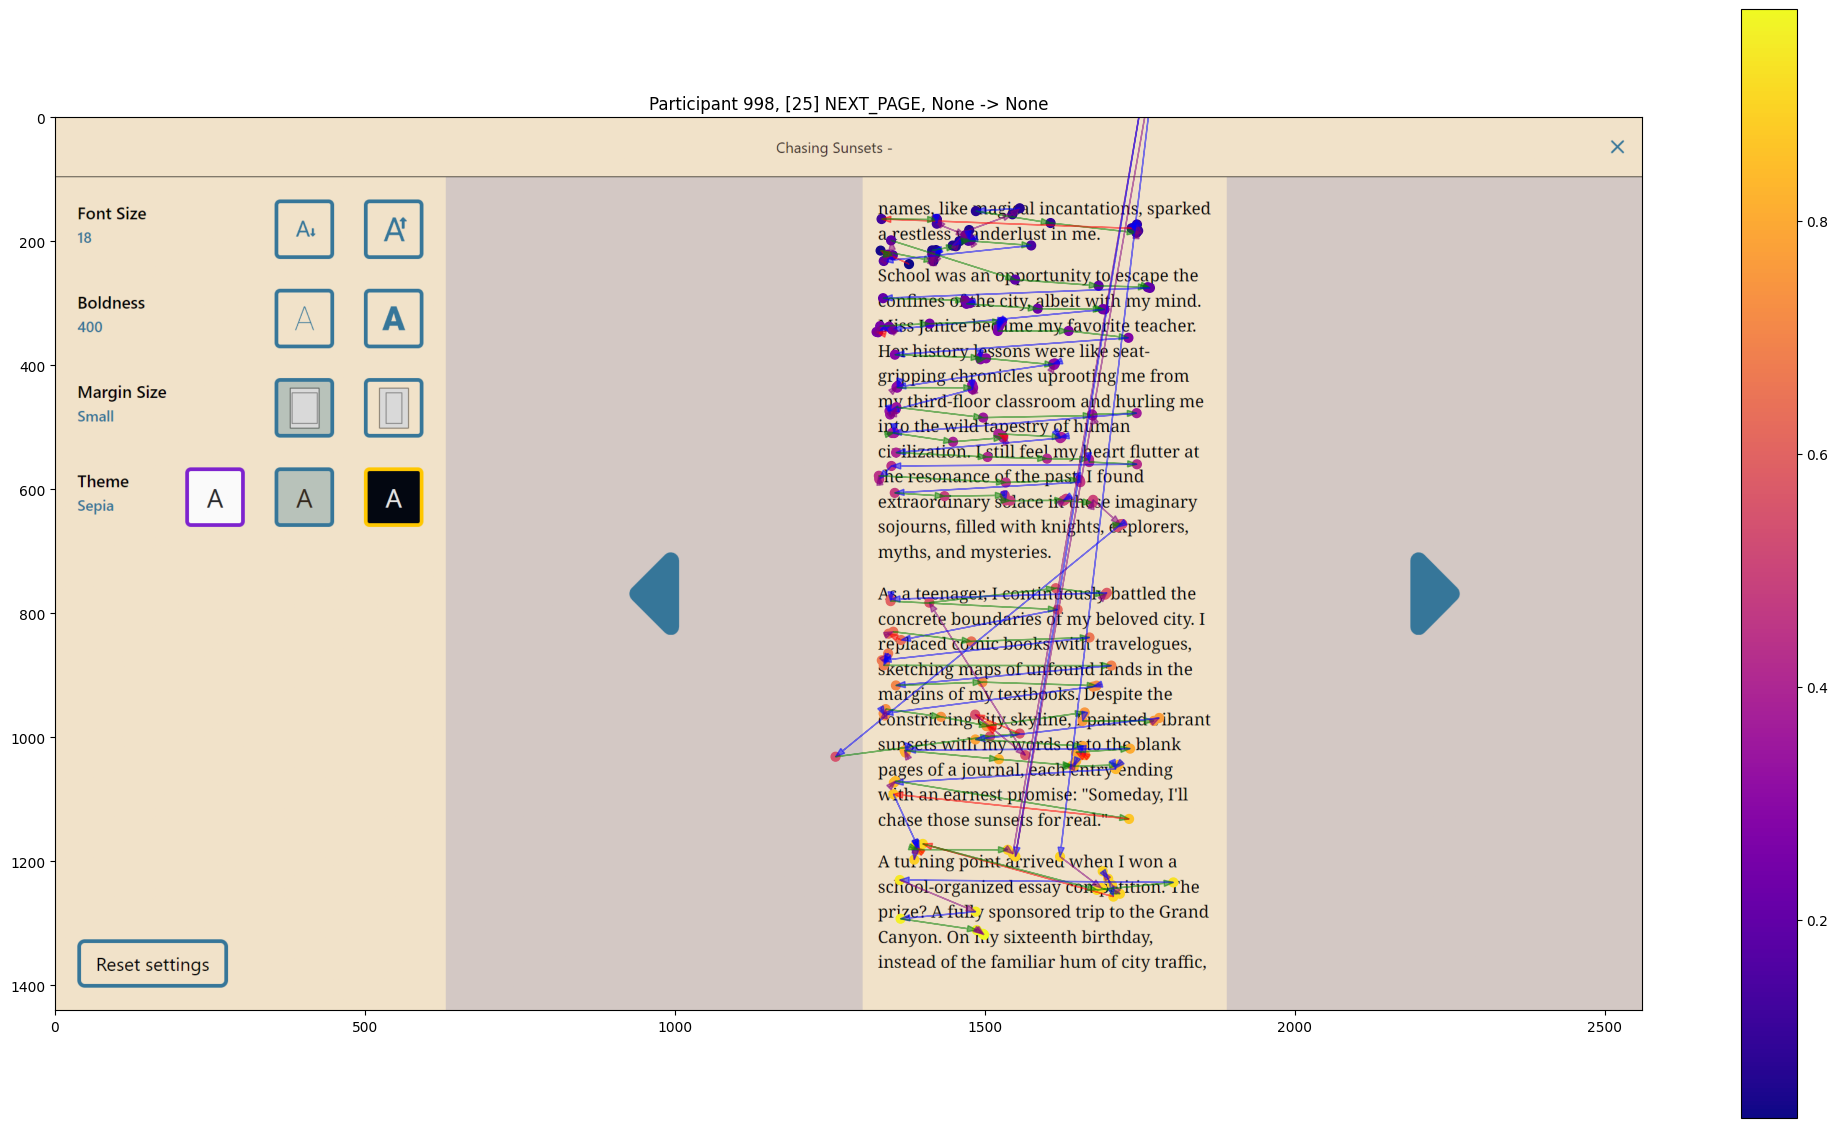

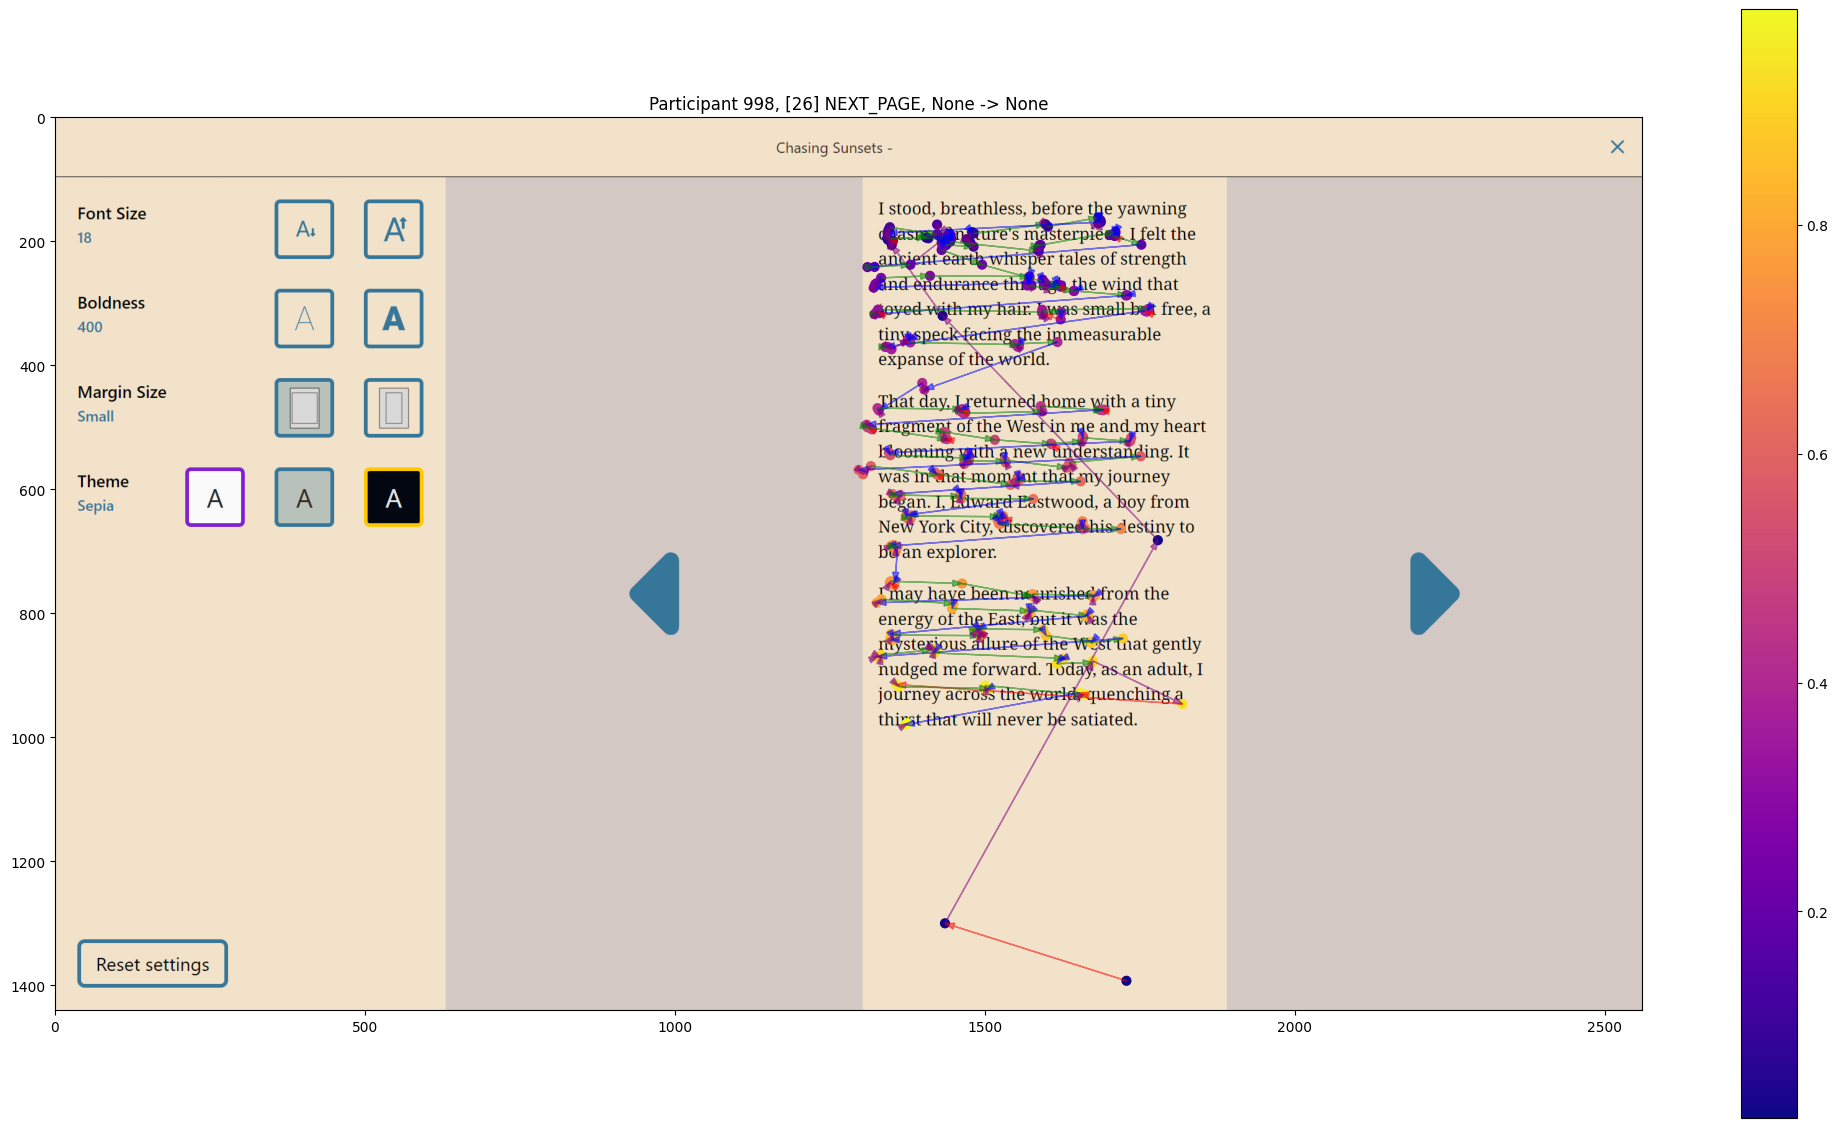

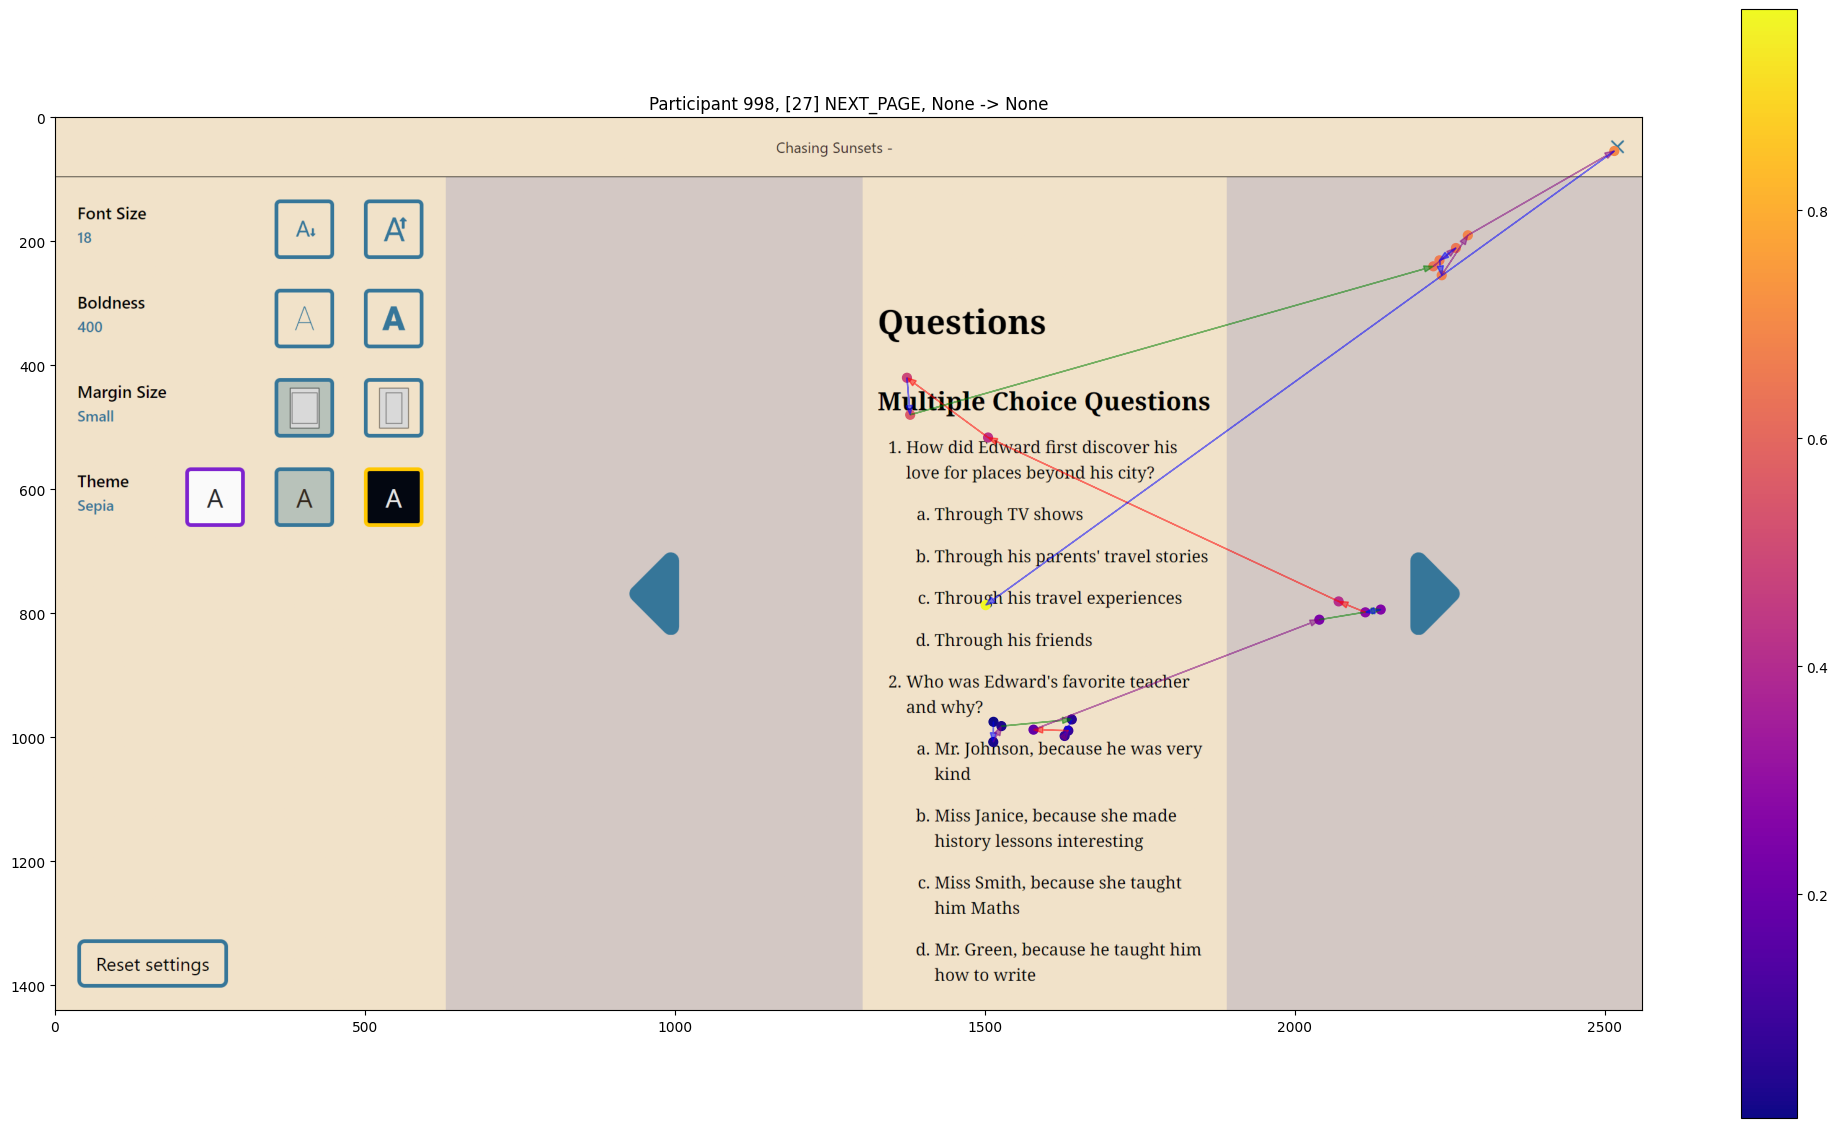

In [2]:
import os
from datetime import datetime

from utils import extract_gaze_data_between_timestamps_proper, plot_fixations_on_screenshot, print_record

# participants that were told that they can change the settings beforehand
participant_ids = [998]

# get the events 
for participant in participant_ids:
  events = Events.select().where(Events.participant_id==participant)
  
  current_json_file = None
  batches_of_events = {}
  current_batch = []
  for event in events:
    if event.event == "SELECT_TREATMENT":
      continue
    elif event.event == "CLOSE_BOOK":
      current_batch.append(event)
      batches_of_events[current_json_file] = current_batch
      current_batch = []
    elif event.event == "OPEN_BOOK":
      timestamp = event.time
      date = datetime.fromtimestamp(timestamp / 1000)
      date_string = date.strftime("%Y-%m-%d_%H-%M-%S")
      current_json_file = f"[{participant}]-{date_string}.json"
      current_batch.append(event)
    else:
      current_batch.append(event)

  # for each json file, get the gaze data
  for json_file, events in batches_of_events.items():
    # get the gaze data for this participant
    # the files are in eye_tracker_data/
    path = "eye_tracker_data/"

    # for start_event in events:
    gaze_data_filename = json_file
    gaze_data_filepath = os.path.join(path, gaze_data_filename)
    # Read the file
    import json
    with open(gaze_data_filepath, "r") as f:
      gaze_data = json.load(f)

    pairs = list(zip(events, events[1:]))
    for begin_page_event, end_page_event in pairs:
      T_start = begin_page_event.time
      T_end = end_page_event.time

      # ignore the event if the participant only looked at this page for less than 5 seconds
      if T_end - T_start < 1_000:
        continue
      gaze_data_between_pageturn_events = extract_gaze_data_between_timestamps_proper(gaze_data, T_start, T_end)
      screenshot_path = begin_page_event.screenshot_file
      SACCADIC_THRESHOLD = 4500
      plot_fixations_on_screenshot(gaze_data_between_pageturn_events, screenshot_path, title=f"Participant {participant}, [{begin_page_event.id}] {begin_page_event.event}, {begin_page_event.old_value} -> {begin_page_event.new_value}", saccadic_threshold=SACCADIC_THRESHOLD)
   


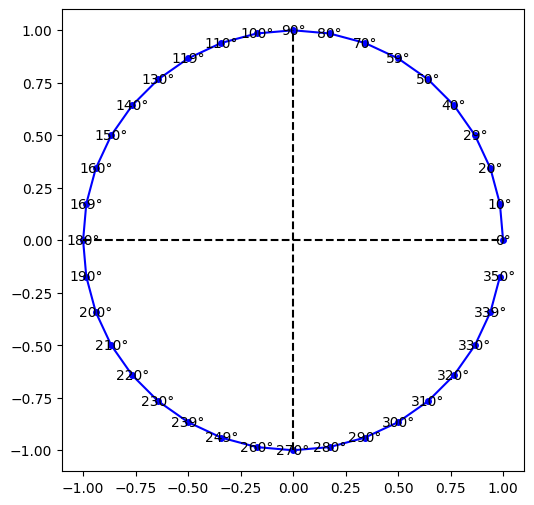

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Creating an array of angles in radians at 20-degree intervals
angles = np.arange(0, 2*np.pi, np.radians(10))

# Creating x and y coordinates for each angle
x = np.cos(angles)
y = np.sin(angles)

# Plotting the unit circle
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'bo-', markersize=4)
plt.plot([0, 0], [-1, 1], 'k--')
plt.plot([-1, 1], [0, 0], 'k--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')

# Adding angle labels
for i in range(len(angles)):
    plt.text(x[i], y[i], f'{int(np.degrees(angles[i]))}°', ha='center', va='center')

# Displaying the plot
plt.show()